 # Imports 

In [26]:
import praw
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression,ElasticNetCV, Lasso, LassoCV,  Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import re

from jupyterthemes import jtplot
jtplot.style()

pd.options.display.max_colwidth = 400


# Load Data

In [27]:
path = '../project_3/ALvsST.csv'

df = pd.read_csv(path)
df.head()

,title,id,body,subreddit
0,,jeatww,,0
1,,jea1j3,,0
2,1 astral project fly to a different planet fly into alien home haunt the alien fly back to your body wake up come to term with the fact u just scared an alien,je9nz7,1 astral project fly to a different planet fly into alien home haunt the alien fly back to your body wake up come to term with the fact u just scared an alien,0
3,several month ago ive taken time to let this sink in i wa practicing meditation on a daily basis and had a vision of an et woman during a meditation i wa only trying to relax not make any sort of contact so the experience ha shocked me out of meditation practice ever since an extraordinarily clear image had come into my mind of this woman i can hardly imagine any person or thing in my mind in ...,je84qo,several month ago ive taken time to let this sink in i wa practicing meditation on a daily basis and had a vision of an et woman during a meditation i wa only trying to relax not make any sort of contact so the experience ha shocked me out of meditation practice ever since an extraordinarily clear image had come into my mind of this woman i can hardly imagine any person or thing in my mind in ...,0
4,think about it if i talk about certain thing then make some thing up the abc agency will prolly go like “ayy lmao he’s a shill”,je5wtj,think about it if i talk about certain thing then make some thing up the abc agency will prolly go like “ayy lmao he’s a shill”,0


# PreProcessing + Modeling

In [28]:
X = df['title']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 63,
                                                    stratify = y )

my_stop_words = text.ENGLISH_STOP_WORDS.union(["ha",'wa','im','doe'])

cv = CountVectorizer(stop_words=my_stop_words,max_features=5000)

cv.fit(X_train)

X_train_cv = cv.transform(X_train)

X_test_cv = cv.transform(X_test)


In [43]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[75,100,125,150,200],
    'max_depth':[None,2,3,4],
    'max_features':[None,'auto']}

gs = GridSearchCV(rf,param_grid=params,cv=5,verbose=1)
gs.fit(X_train_cv,y_train)
print(gs.best_score_) #crossval score
gs.best_params_



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.2min finished


0.97441906653426


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}

# Evaluate Model Metrics

In [44]:
gs.score(X_train_cv,y_train) , gs.score(X_test_cv,y_test)

(1.0, 0.966412213740458)

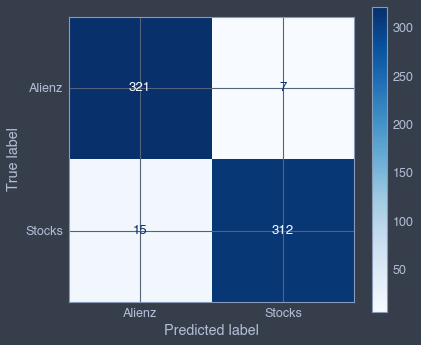

In [45]:
# Generate predictions.
preds = gs.predict(X_test_cv)
pred_proba = gs.predict_proba(X_test_cv)[:,1]

def metrics(y_test, y_predict, pred_proba):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Predicted Alienz', 'Predicted Stonks'], 
                            columns=['Actual Alienz', 'Actual Stonks']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')
    print('ROC_AUC SCORE %s ' %roc_auc_score(y_test, pred_proba))

plot_confusion_matrix(gs, X_test_cv, y_test, cmap='Blues', 
                      values_format='d', display_labels=['Alienz', 'Stocks']);

In [46]:
metrics(y_test, preds, pred_proba)

Accuracy score 0.966412213740458  

----------------------------------------------------------------
                  Actual Alienz  Actual Stonks
Predicted Alienz            321              7
Predicted Stonks             15            312 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       328
           1       0.98      0.95      0.97       327

    accuracy                           0.97       655
   macro avg       0.97      0.97      0.97       655
weighted avg       0.97      0.97      0.97       655

-----------------------------------------------------------------
ROC_AUC SCORE 0.9919118743939733 


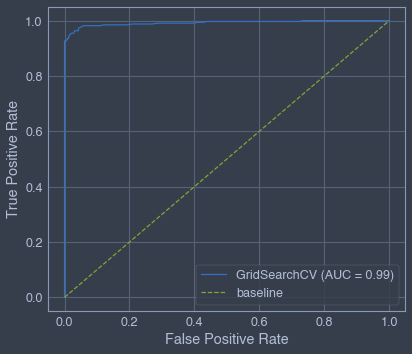

In [48]:

plot_roc_curve(gs, X_test_cv, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [ ]:
# pipe = Pipeline([
#     ('cv', CountVectorizer()),
#     ('rt', RandomForestClassifier())
# ])

# # Define dictionary of hyperparameters.
# pipe_params = {' cv__stop_words': ['english', None], 
#                 'cv__ngram_range': [(2,2), (1,2), (2,3)],
#                 'cv__min_df': [1,2, 3], 
#                 'cv__max_features': [100, 1000,3000,5000],
#                 'cv__max_df': [.7,.9,.98],
#                 'cv__max_df': [.7,.9,.98],
              
              
#               }

# pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
#                                 pipe_params, # What is the dictionary of hyperparameters?
#                                 cv=5, # What number of folds in CV will we use?
#                                 verbose=1)

# #Fit the GridSearchCV object 
#     pipe_gridsearch.fit(X_train_cv, y_train);

#     #best score and param used
#     pipe_gridsearch.best_score_ , pipe_gridsearch.best_params_

#     # Evaluate the best fit model on the test data.
#     pipe_gridsearch.score(X_test_cv, y_test)


